In [80]:


import nltk
nltk.download()


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Package bllip_wsj_no_aux is already up-to-date!
       | Downloading package book_grammars to /root/nltk_data..


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [81]:
import numpy as numpy
import pandas as pd
import re
import string
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

In [83]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ekta mam/Assingment/data1.csv',encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [84]:
df.columns = ['Tweet_Type','id','Date','Query','Profile','Tweet' ]
df.head()

,Tweet_Type,id,Date,Query,Profile,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [85]:
df.shape

(1599999, 6)

In [86]:
df.isnull().sum()

Tweet_Type    0
id            0
Date          0
Query         0
Profile       0
Tweet         0
dtype: int64

In [87]:
len(df)

1599999

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Tweet_Type  1599999 non-null  int64 
 1   id          1599999 non-null  int64 
 2   Date        1599999 non-null  object
 3   Query       1599999 non-null  object
 4   Profile     1599999 non-null  object
 5   Tweet       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [89]:
df.dtypes

Tweet_Type     int64
id             int64
Date          object
Query         object
Profile       object
Tweet         object
dtype: object

In [90]:
df.Tweet_Type.unique()

array([0, 4])

In [91]:
df=df[['Tweet','Tweet_Type']]
df.head()

,Tweet,Tweet_Type
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [92]:
df['Tweet_Type'][df['Tweet_Type']==4]=1
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Tweet,Tweet_Type
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0
...,...,...
1599994,Just woke up. Having no school is the best fee...,1
1599995,TheWDB.com - Very cool to hear old Walt interv...,1
1599996,Are you ready for your MoJo Makeover? Ask me f...,1
1599997,Happy 38th Birthday to my boo of alll time!!! ...,1


In [93]:
df.Tweet_Type.unique()

array([0, 1])

In [94]:
df['Tweet']=df['Tweet'].str.lower()

In [95]:
df['Tweet'].tail()

1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: Tweet, dtype: object

25% of data is taken due too large dataset

In [96]:
df_pos = df[df['Tweet_Type'] == 1]  
df_neg = df[df['Tweet_Type'] == 0]

In [97]:
df_pos = df_pos.iloc[:int(20000)]
df_neg = df_neg.iloc[:int(20000)]
df = pd.concat([df_pos, df_neg])

In [98]:
from nltk.tokenize import RegexpTokenizer

**Removing Stop words**

In [99]:
stopwords_list = stopwords.words('english')
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

**Removing Punctuations**

In [100]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [101]:
df['Tweet']= df['Tweet'].apply(lambda x: cleaning_punctuations(x))
df['Tweet'].tail()

19995                            one more day of holidays 
19996    feeling so down right now  i hate you damn hum...
19997    geezi hv to read the whole book of personality...
19998    i threw my sign at donnie and he bent over to ...
19999    heather2711 good thing i didnt find any then  ...
Name: Tweet, dtype: object

**Removing Repeat Char**

In [102]:
def cleaning_repeating_char(Tweet):
    return re.sub(r'(.)\1+', r'\1', Tweet)

In [103]:
df['Tweet']= df['Tweet'].apply(lambda x: cleaning_punctuations(x))
df['Tweet'].tail()

19995                            one more day of holidays 
19996    feeling so down right now  i hate you damn hum...
19997    geezi hv to read the whole book of personality...
19998    i threw my sign at donnie and he bent over to ...
19999    heather2711 good thing i didnt find any then  ...
Name: Tweet, dtype: object

**Removing 	At sign (@) & emails**

In [104]:
def cleaning_email(df):
    return re.sub('@[^\s]+', ' ', df)

In [105]:
df['Tweet']= df['Tweet'].apply(lambda x: cleaning_email(x))
df['Tweet'].tail()

19995                            one more day of holidays 
19996    feeling so down right now  i hate you damn hum...
19997    geezi hv to read the whole book of personality...
19998    i threw my sign at donnie and he bent over to ...
19999    heather2711 good thing i didnt find any then  ...
Name: Tweet, dtype: object

**Removing Url links & Removing Numbers**

In [106]:
def cleaning_URLs(df):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',df)

In [107]:
df['Tweet'] = df['Tweet'].apply(lambda x: cleaning_URLs(x))
df['Tweet'].tail()

19995                            one more day of holidays 
19996    feeling so down right now  i hate you damn hum...
19997    geezi hv to read the whole book of personality...
19998    i threw my sign at donnie and he bent over to ...
19999    heather2711 good thing i didnt find any then  ...
Name: Tweet, dtype: object

In [108]:
def cleaning_numbers(df):
    return re.sub('[0-9]+', '', df)

In [109]:
df['Tweet'] = df['Tweet'].apply(lambda x: cleaning_numbers(x))
df['Tweet'].tail()

19995                            one more day of holidays 
19996    feeling so down right now  i hate you damn hum...
19997    geezi hv to read the whole book of personality...
19998    i threw my sign at donnie and he bent over to ...
19999    heather good thing i didnt find any then  none...
Name: Tweet, dtype: object

**WordCloud**

In [110]:
from wordcloud import WordCloud

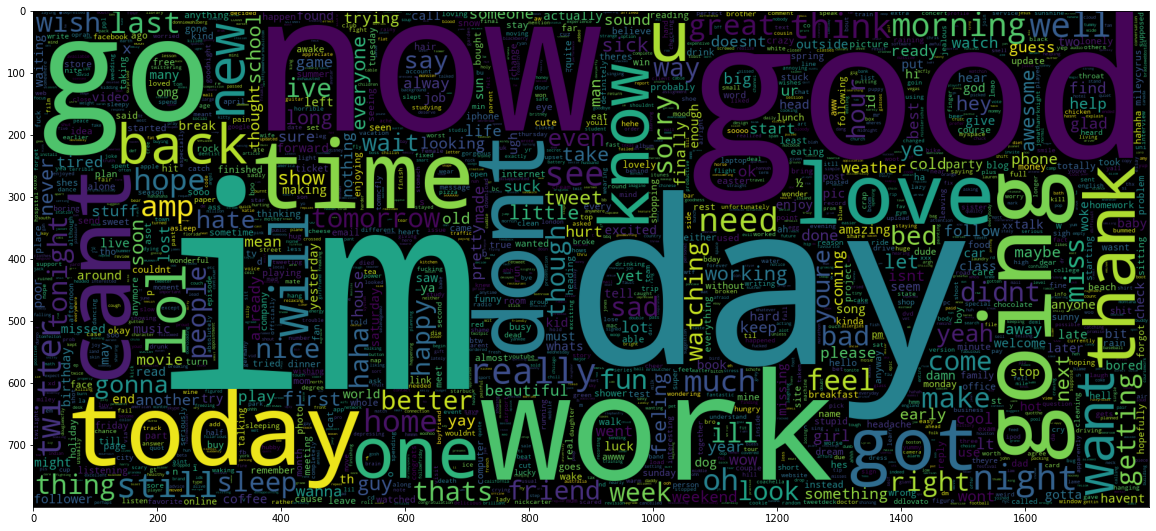

In [111]:
word_cloud = WordCloud(max_words = 2000 , width = 1800 , height = 800, collocations=False)
plt.figure(figsize = (20,20))
wc = word_cloud.generate(" ".join(df["Tweet"]))
plt.imshow(wc)

**Tweet Tokenization**

In [112]:
from nltk.tokenize import RegexpTokenizer

In [113]:
tokenizer = RegexpTokenizer(r'\w+')
df['Tweet'] = df['Tweet'].apply(tokenizer.tokenize)
df['Tweet'].head()

799999     [i, love, healthuandpets, u, guys, r, the, best]
800000    [im, meeting, up, with, one, of, my, besties, ...
800001    [darealsunisakim, thanks, for, the, twitter, a...
800002    [being, sick, can, be, really, cheap, when, it...
800003    [lovesbrooklyn, he, has, that, effect, on, eve...
Name: Tweet, dtype: object

**Stemming**

In [114]:
%%time
st = nltk.PorterStemmer()
def stemming_on_text(df):
    text = [st.stem(word) for word in df]
    return df

df['Tweet']= df['Tweet'].apply(lambda x: stemming_on_text(x))

CPU times: user 8.06 s, sys: 11.8 ms, total: 8.07 s
Wall time: 8.07 s


In [115]:
df['Tweet'].head()

799999     [i, love, healthuandpets, u, guys, r, the, best]
800000    [im, meeting, up, with, one, of, my, besties, ...
800001    [darealsunisakim, thanks, for, the, twitter, a...
800002    [being, sick, can, be, really, cheap, when, it...
800003    [lovesbrooklyn, he, has, that, effect, on, eve...
Name: Tweet, dtype: object

**Lemmatization**

In [116]:
%%time
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(df):
    text = [lm.lemmatize(word) for word in df]
    return df

df['Tweet'] = df['Tweet'].apply(lambda x: lemmatizer_on_text(x))



CPU times: user 1.72 s, sys: 4.4 ms, total: 1.72 s
Wall time: 1.72 s


In [117]:
df['Tweet'].head()

799999     [i, love, healthuandpets, u, guys, r, the, best]
800000    [im, meeting, up, with, one, of, my, besties, ...
800001    [darealsunisakim, thanks, for, the, twitter, a...
800002    [being, sick, can, be, really, cheap, when, it...
800003    [lovesbrooklyn, he, has, that, effect, on, eve...
Name: Tweet, dtype: object